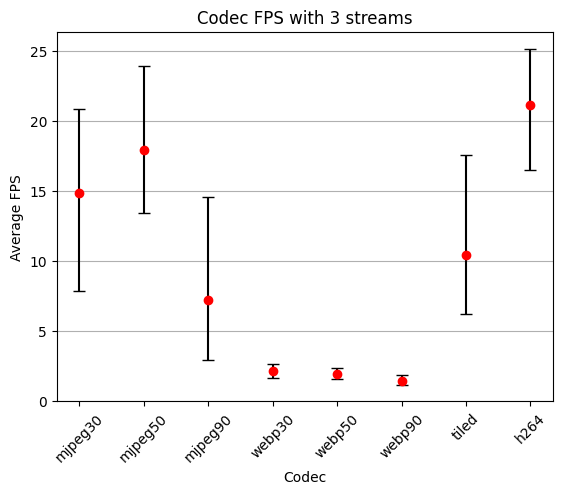

In [2]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
from collections import defaultdict
import numpy as np

experiments = defaultdict(list)

for codec in ['mjpeg30', 'mjpeg50', 'mjpeg90', 'webp30', 'webp50', 'webp90', 'tiled_spatial', 'h264']:
    for experiment in os.listdir(os.path.join('3-everyone', codec)):
        experiment_path = os.path.join('3-everyone', codec, experiment)
        with open(experiment_path) as f:
            d = json.load(f)
            # use only codec name as key
            experiments[experiment.split('_')[0]].append(d[-1]['Overall FPS'])

average_fps = {}
min_fps = {}
max_fps = {}
for e in experiments:
    average_fps[e] = np.mean(experiments[e])
    min_fps[e] = np.mean(experiments[e]) - np.min(experiments[e])
    max_fps[e] = np.max(experiments[e]) - np.mean(experiments[e])

# print(average_fps)
# lists = sorted(average_fps.items(), key=lambda item: -item[1]) # sorted by key, return a list of tuples
# x, y = zip(*lists) # unpack a list of pairs into two tuples
x = list(average_fps.keys())
y = list(average_fps.values())

yerr = [list(min_fps.values()), list(max_fps.values())]

# Customize the plot
# plt.figure(figsize=(15, 6))
plt.errorbar(x, y, yerr=yerr, fmt="ro", capsize=4, ecolor = "black")
plt.title('Codec FPS with 3 streams')
plt.xticks(rotation=45)
plt.xlabel('Codec')
plt.ylabel('Average FPS')
plt.grid(True, axis='y')
# plt.legend(title='Legend')

# Show the plot
plt.show()

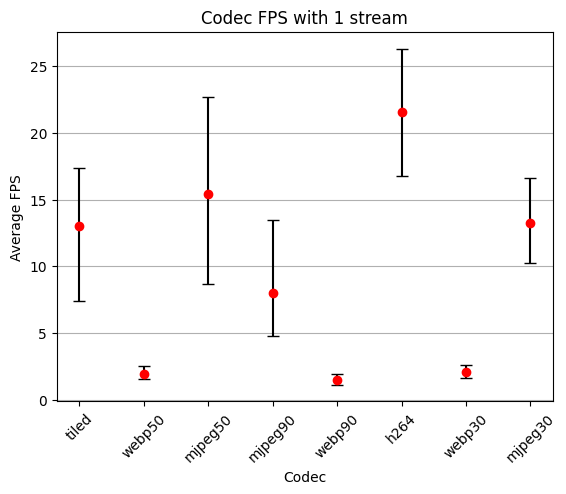

In [3]:
experiments = defaultdict(list)

for dir in ['1-beitong', '1-bo', '1-ryan']:
    for codec_file in os.listdir(dir):
        if 'try2' in codec_file or 'individual' in codec_file:
            continue
        
        experiment_path = os.path.join(dir, codec_file)
        with open(experiment_path) as f:
            d = json.load(f)
            # use only codec name as key
            experiments[codec_file.split('_')[0]].append(d[-1]['Overall FPS'])

average_fps = {}
min_fps = {}
max_fps = {}
for e in experiments:
    average_fps[e] = np.mean(experiments[e])
    min_fps[e] = np.mean(experiments[e]) - np.min(experiments[e])
    max_fps[e] = np.max(experiments[e]) - np.mean(experiments[e])

x = list(average_fps.keys())
y = list(average_fps.values())

yerr = [list(min_fps.values()), list(max_fps.values())]

# plt.figure(figsize=(15, 6))
plt.errorbar(x, y, yerr=yerr, fmt="ro", capsize=4, ecolor = "black")
plt.title('Codec FPS with 1 stream')
plt.xticks(rotation=45)
plt.xlabel('Codec')
plt.ylabel('Average FPS')
plt.grid(True, axis='y')
plt.show()

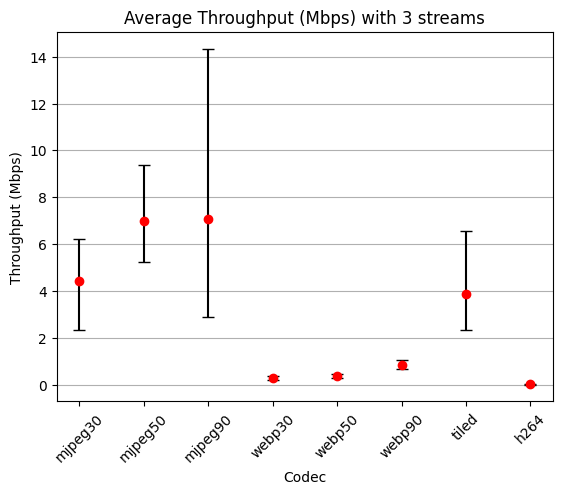

In [4]:
experiments = defaultdict(list)

for codec in ['mjpeg30', 'mjpeg50', 'mjpeg90', 'webp30', 'webp50', 'webp90', 'tiled_spatial', 'h264']:
    for experiment in os.listdir(os.path.join('3-everyone', codec)):
        experiment_path = os.path.join('3-everyone', codec, experiment)
        with open(experiment_path) as f:
            d = json.load(f)
            bytes_received = float(d[-1]['Total bytes received'].split()[0])
            time = d[-1]['Total time']
            # print(bytes_received / time)
            experiments[experiment.split('_')[0]].append(bytes_received / time)

average_fps = {}
min_fps = {}
max_fps = {}
for e in experiments:
    average_fps[e] = np.mean(experiments[e])
    min_fps[e] = np.mean(experiments[e]) - np.min(experiments[e])
    max_fps[e] = np.max(experiments[e]) - np.mean(experiments[e])

x = list(average_fps.keys())
y = list(average_fps.values())

yerr = [list(min_fps.values()), list(max_fps.values())]

# plt.figure(figsize=(15, 6))
plt.errorbar(x, y, yerr=yerr, fmt="ro", capsize=4, ecolor = "black")
plt.title('Average Throughput (Mbps) with 3 streams')
plt.xticks(rotation=45)
plt.xlabel('Codec')
plt.ylabel('Throughput (Mbps)')
plt.grid(True, axis='y')
plt.show()

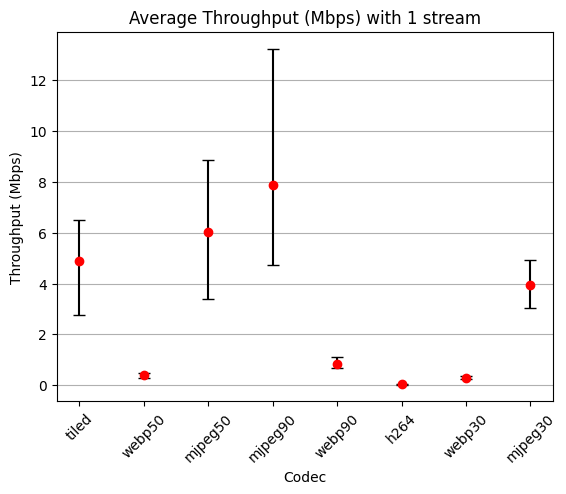

In [5]:
experiments = defaultdict(list)

for dir in ['1-beitong', '1-bo', '1-ryan']:
    for codec_file in os.listdir(dir):
        if 'try2' in codec_file or 'individual' in codec_file:
            continue
        
        experiment_path = os.path.join(dir, codec_file)
        with open(experiment_path) as f:
            d = json.load(f)
            bytes_received = float(d[-1]['Total bytes received'].split()[0])
            time = d[-1]['Total time']
            # print(bytes_received / time)
            experiments[codec_file.split('_')[0]].append(bytes_received / time)

average_fps = {}
min_fps = {}
max_fps = {}
for e in experiments:
    average_fps[e] = np.mean(experiments[e])
    min_fps[e] = np.mean(experiments[e]) - np.min(experiments[e])
    max_fps[e] = np.max(experiments[e]) - np.mean(experiments[e])

x = list(average_fps.keys())
y = list(average_fps.values())

yerr = [list(min_fps.values()), list(max_fps.values())]

# plt.figure(figsize=(15, 6))
plt.errorbar(x, y, yerr=yerr, fmt="ro", capsize=4, ecolor = "black")
plt.title('Average Throughput (Mbps) with 1 stream')
plt.xticks(rotation=45)
plt.xlabel('Codec')
plt.ylabel('Throughput (Mbps)')
plt.grid(True, axis='y')
plt.show()

In [6]:
import cv2

# Plot psnr of each codec
def psnr(y, p):
  mse = np.mean((y-p)**2)
  if mse == 0:
    return 100
  return 20 * np.log10((255 ** 2) / np.sqrt(mse))

psnr_averages = np.zeros((9,))
psnr_mins = np.full((9,), float('inf'))
psnr_maxs = np.zeros((9,))

num_images = len(os.listdir('../received_imgs_0_127.0.0.1'))

for img_name in sorted(os.listdir('../received_imgs_0_127.0.0.1')):
  print(img_name)
  reference_img = cv2.imread(f'../received_imgs_0_127.0.0.1/{img_name}')
  if reference_img is None:
    print(f'Image not found: ../received_imgs_0_127.0.0.1/{img_name}')

  # for i,dir in enumerate(filter(lambda x: x.startswith('received_imgs'), sorted(os.listdir('..')))):
  for i,dir in enumerate(['received_imgs_8_25Mbr_127.0.0.1']):
    img_path = f'../{dir}/{img_name}'
    # img_idx = int(img_name.split('.')[0])

    img = cv2.imread(img_path)
    if img is None:
      print(f'Image not found: {img_path}')

    psnr_ = psnr(reference_img, img)

    psnr_averages[i] += psnr_
    psnr_mins[i] = np.minimum(psnr_, psnr_mins[i])
    psnr_maxs[i] = np.maximum(psnr_, psnr_maxs[i])

psnr_averages = psnr_averages / num_images

print(list(psnr_averages))
print(list(psnr_mins))
print(list(psnr_maxs))

0.jpg
1.jpg
10.jpg
100.jpg
101.jpg
102.jpg
103.jpg
104.jpg
105.jpg
106.jpg
107.jpg
108.jpg
109.jpg
11.jpg
110.jpg
111.jpg
112.jpg
113.jpg
114.jpg
115.jpg
116.jpg
117.jpg
118.jpg
119.jpg
12.jpg
120.jpg
121.jpg
122.jpg
123.jpg
124.jpg
125.jpg
126.jpg
127.jpg
128.jpg
129.jpg
13.jpg
130.jpg
131.jpg
132.jpg
133.jpg
134.jpg
135.jpg
136.jpg
137.jpg
138.jpg
139.jpg
14.jpg
140.jpg
141.jpg
142.jpg
143.jpg
144.jpg
145.jpg
146.jpg
147.jpg
148.jpg
149.jpg
15.jpg
150.jpg
151.jpg
152.jpg
153.jpg
154.jpg
155.jpg
156.jpg
157.jpg
158.jpg
159.jpg
16.jpg
160.jpg
161.jpg
162.jpg
163.jpg
164.jpg
165.jpg
166.jpg
167.jpg
168.jpg
169.jpg
17.jpg
170.jpg
171.jpg
172.jpg
173.jpg
174.jpg
175.jpg
176.jpg
177.jpg
178.jpg
179.jpg
18.jpg
180.jpg
181.jpg
182.jpg
183.jpg
184.jpg
185.jpg
186.jpg
187.jpg
188.jpg
189.jpg
19.jpg
190.jpg
191.jpg
192.jpg
193.jpg
194.jpg
195.jpg
196.jpg
197.jpg
198.jpg
199.jpg
2.jpg
20.jpg
200.jpg
21.jpg
22.jpg
23.jpg
24.jpg
25.jpg
26.jpg
27.jpg
28.jpg
29.jpg
3.jpg
30.jpg
31.jpg
32.jpg
33.jpg


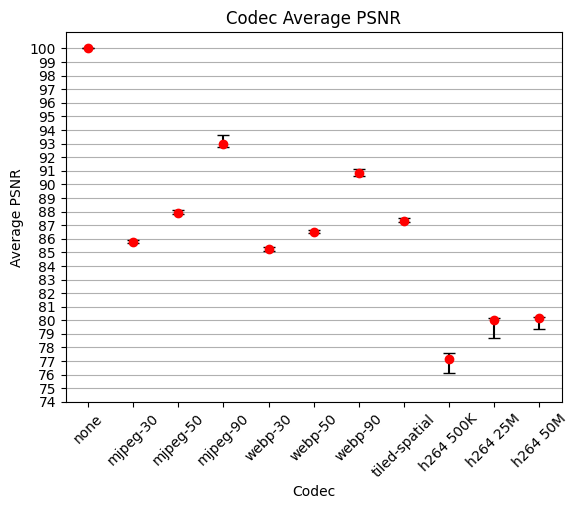

In [7]:
psnr_averages_ = np.array([100.0, 85.78530508700939, 87.90214339599851, 92.97980465063046, 85.228816259259, 86.50598993873818, 90.8225579375932, 87.3336774298517, 77.14631056748992, 80.03372741969253, 80.18711289208177])
psnr_mins_ = np.array([100.0, 85.71121509704457, 87.78831186104364, 92.74095008229258, 85.12883236816288, 86.40476427685837, 90.61717456690661, 87.21198290843786, 76.13702087471329, 78.72898662831923, 79.3941739600835])
psnr_maxs_ = np.array([100.0, 85.94002313716223, 88.1129627885528, 93.64514628791503, 85.35715455831665, 86.66991077950473, 91.12386122452968, 87.53902720046854, 77.58523442822677, 80.15872924425354, 80.26223816628872])

psnr_min_err = psnr_averages_ - psnr_mins_
psnr_max_err = psnr_maxs_ - psnr_averages_

names = ['none', 'mjpeg-30', 'mjpeg-50', 'mjpeg-90', 'webp-30', 'webp-50', 'webp-90', 'tiled-spatial', 'h264 500K', 'h264 25M', 'h264 50M']

plt.errorbar(names, psnr_averages_, yerr=[psnr_min_err, psnr_max_err], fmt="ro", capsize=4, ecolor = "black")
# plt.plot(names[1:], psnr_averages_[1:])
plt.title('Codec Average PSNR')
plt.xticks(rotation=45)
plt.xlabel('Codec')
plt.ylabel('Average PSNR')
plt.grid(True, axis='y')
y_min, y_max = plt.ylim()  # Get the current y-axis limits
plt.yticks(range(int(y_min), int(y_max)))
# plt.legend(title='Legend')

# Show the plot
plt.show()

In [8]:
experiments = defaultdict(list)
names = []

for experiment in filter(lambda x: x.endswith('_logs_127.0.0.1.json'), sorted(os.listdir('../localhost-experiments/'))):
    with open(f'../{experiment}') as f:
        # print(f)
        d = json.load(f)
        for frame_measure in d[:-1]:
            experiments[experiment.split('_logs')[0]].append(float(frame_measure['frame_size'].split()[0]))
        names.append(experiment.split('_logs')[0])

size_averages = np.zeros_like(names, dtype=float)
size_mins = np.full_like(names, float('inf'), dtype=float)
size_maxs = np.zeros_like(names, dtype=float)

print(names)

for i,e in enumerate(experiments):
    # print(type(experiments[e])
    size_averages[i] = np.mean(experiments[e])
    size_mins[i] = np.mean(experiments[e]) - np.min(experiments[e])
    size_maxs[i] = np.max(experiments[e]) - np.mean(experiments[e])

# print(average_fps)
# lists = sorted(average_fps.items(), key=lambda item: -item[1]) # sorted by key, return a list of tuples
# x, y = zip(*lists) # unpack a list of pairs into two tuples

yerr = np.stack((size_mins, size_maxs))
print(yerr)
print(size_averages)

# Customize the plot
# plt.figure(figsize=(15, 6))
plt.errorbar(names, size_averages, yerr=yerr, fmt="ro", capsize=4, ecolor = "black")
plt.title('Average Frame Size')
plt.xticks(rotation=45)
plt.xlabel('Codec')
plt.ylabel('Kilo Bytes')
plt.grid(True, axis='y')
# plt.legend(title='Legend')

# Show the plot
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../h264_25M_logs_127.0.0.1.json'

defaultdict(<class 'list'>, {'h264_25M': [25.485625233073936], 'h264_50M': [23.23159791229099], 'h264': [29.761208704785776], 'mjpeg30': [40.4714808483036], 'mjpeg50': [37.52234576686812], 'mjpeg90': [30.04445733099921], 'tiled': [30.522420402241828], 'webp30': [3.0800376241279066], 'webp50': [2.8240531415482404], 'webp90': [2.085551173476917]})


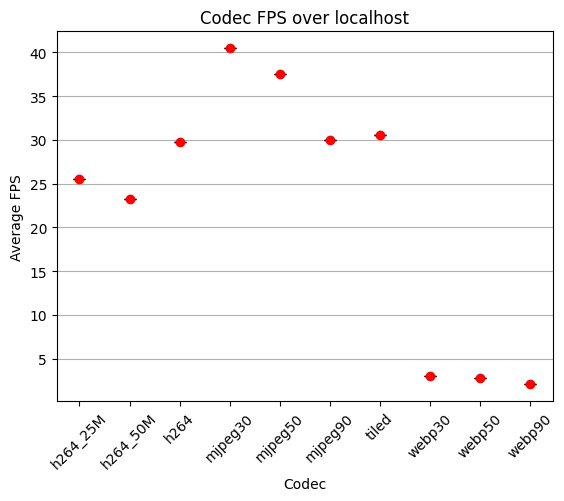

In [ ]:
localhost_fps_exp = defaultdict(list)

for experiment in filter(lambda x: x.endswith('_logs_127.0.0.1.json'), sorted(os.listdir('../localhost-experiments/'))):
    with open(f'../localhost-experiments/{experiment}') as f:
        d = json.load(f)
        localhost_fps_exp[experiment.split('_logs')[0]].append(d[-1]['Overall FPS'])

print(localhost_fps_exp)


average_fps = {}
min_fps = {}
max_fps = {}
for e in localhost_fps_exp:
    average_fps[e] = np.mean(localhost_fps_exp[e])
    min_fps[e] = np.mean(localhost_fps_exp[e]) - np.min(localhost_fps_exp[e])
    max_fps[e] = np.max(localhost_fps_exp[e]) - np.mean(localhost_fps_exp[e])

# print(average_fps)
# lists = sorted(average_fps.items(), key=lambda item: -item[1]) # sorted by key, return a list of tuples
# x, y = zip(*lists) # unpack a list of pairs into two tuples
x = list(average_fps.keys())
y = list(average_fps.values())

yerr = [list(min_fps.values()), list(max_fps.values())]

# Customize the plot
# plt.figure(figsize=(15, 6))
plt.errorbar(x, y, yerr=yerr, fmt="ro", capsize=4, ecolor = "black")
plt.title('Codec FPS over localhost')
plt.xticks(rotation=45)
plt.xlabel('Codec')
plt.ylabel('Average FPS')
plt.grid(True, axis='y')
# plt.legend(title='Legend')

# Show the plot
plt.show()